<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/04 Clasificación y Agrupamiento/notebooks/12-MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Práctica 1: MNIST

In [ ]:
import numpy as np
from keras.datasets import mnist

# Load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print(X_train.shape)

x_train = np.reshape(X_train, (len(X_train), -1)) / 255.
x_test = np.reshape(X_test, (len(X_test), -1)) / 255.

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 784)
(60000,)
(10000,)


Algunos ejemplos

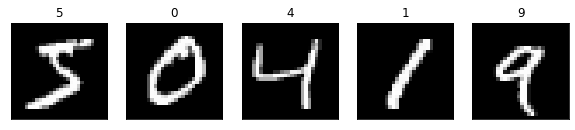

In [ ]:
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(Y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

Veamos el coeficiente de silueta de los datos en el espacio de dimensión 784.

⭕ ¿Qué información nos da este valor respecto al método de clasificación que usaremos?

In [ ]:
from sklearn.metrics import silhouette_score

labels = np.unique(y_train)

silhouette_score(x_train,y_train)    

0.042750593525671406

## 1. PCA

Ahora, apliquemos PCA a los datos. De esta manera, reducimos la dimensión de los puntos, de 784 a sólo 2.

**Importante**: Observa que entrenamos a PCA con el conjunto de entrenamiento y el conjunto de prueba, sólo lo transformamos con el modelo ya entrenado. 

⭕ ¿Por qué no entrenar con todo el conjunto de datos?

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_train)

PCA(n_components=2)

In [ ]:
z_train = pca.transform(x_train)
z_test = pca.transform(x_test)

print(z_train.shape)
print(z_test.shape)

(60000, 2)
(10000, 2)


Ya podemos ver cómo se ve el conjunto de puntos, separado por clases.

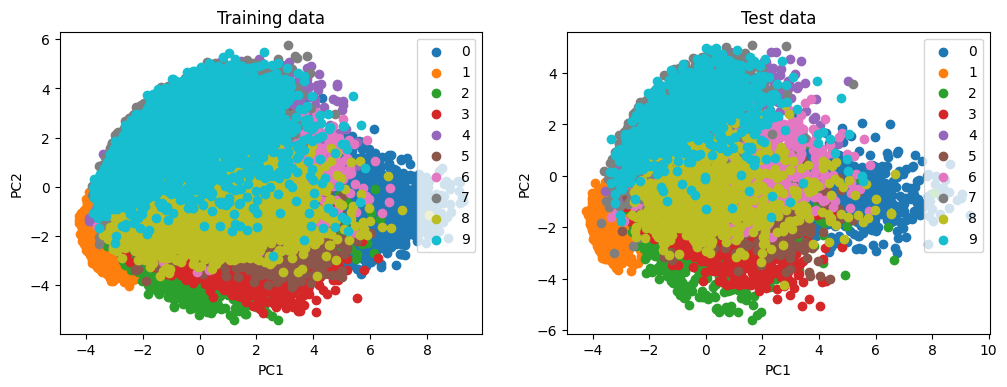

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.subplot(1, 2, 1)
plt.title("Training data")
for cl in range(10):
  plt.scatter(z_train[y_train==cl, 0], z_train[y_train==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1, 2, 2)
plt.title("Test data")
for cl in range(10):
  plt.scatter(z_test[y_test==cl, 0], z_test[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Veamos la varianza agregada por cada una de las primeras 20 componentes principales, usando el atributo `explained_variance_ratio_` de la clase PCA.

[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.02022991
 0.01715814 0.01692108 0.01578631 0.01482952 0.01324554 0.01276862
 0.01187137 0.01152563]


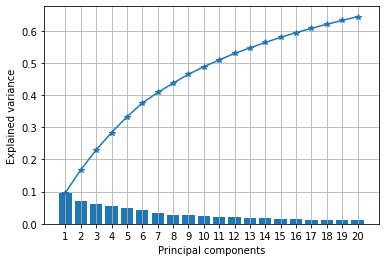

In [ ]:
pca = PCA(n_components=20).fit(x_train)

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), range(1, len(pca.explained_variance_ratio_)+1))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), '-*')
plt.grid()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")
print(pca.explained_variance_ratio_)

Varianza de todas las componentes principales.

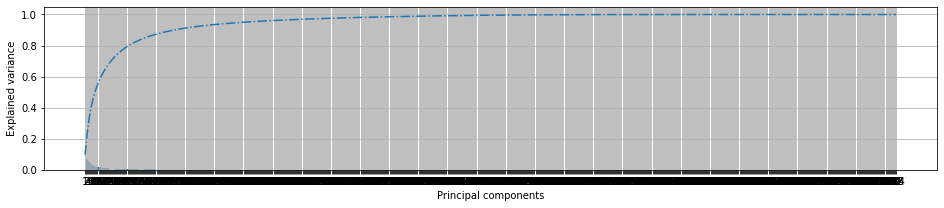

In [ ]:
pca = PCA(n_components=784).fit(x_train)

plt.figure(figsize=(16, 3))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), range(1, len(pca.explained_variance_ratio_)+1))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), '-.')
plt.grid()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")
plt.show()

¿Con cuántas componentes principales conseguirías 95% de la varianza?

El 95% de la varianza se obtiene con 153 componentes principales


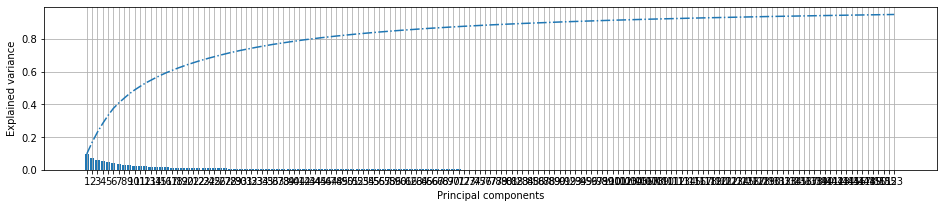

In [ ]:
maxPC = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0]
print(f"El 95% de la varianza se obtiene con {maxPC} componentes principales")

plt.figure(figsize=(16, 3))
plt.bar(range(1, len(pca.explained_variance_ratio_[:maxPC])+1), pca.explained_variance_ratio_[:maxPC])
plt.xticks(range(1, len(pca.explained_variance_ratio_[:maxPC])+1), range(1, len(pca.explained_variance_ratio_[:maxPC])+1))
plt.plot(range(1, len(pca.explained_variance_ratio_[:maxPC])+1), np.cumsum(pca.explained_variance_ratio_[:maxPC]), '-.')
plt.grid()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")


plt.show()

## 2. t-SNE

Ahora, exploremos [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) "t-distributed Stochastic Neighbor Embedding". 

El parámetro importante de este método es `perplexity`, el cual es un valor que debe ser más grande, cuanto más complejo es el dataset. Tiene relación con la cantidad de vecinos cercanos que toma el algoritmo para cada punto.

Este método puede ser más tardado con una cantidad grande de datos y dimensiones, por lo que podemos tomar una muestra de los datos originales.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
z_train = tsne.fit_transform(x_train[:10000])
print(z_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2)


In [ ]:
z_test = tsne.fit_transform(x_test[:10000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


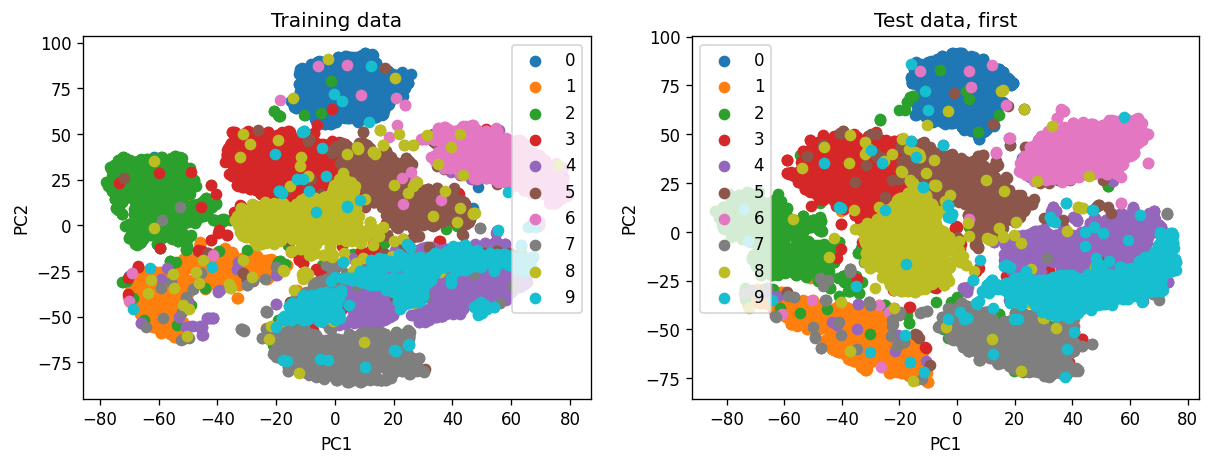

In [ ]:
plt.figure(figsize=(12, 4),dpi=120)

plt.subplot(1, 2, 1)
plt.title("Training data")
for cl in range(10):
  plt.scatter(z_train[y_train[:10000]==cl, 0], z_train[y_train[:10000]==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.title("Test data, first")
for cl in range(10):
  plt.scatter(z_test[y_test==cl, 0], z_test[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.show()

## ⭕ Práctica

* Usando algún método de clasificación, realiza la tarea de clasificación sobre estas representaciones bidimensionales de los datos. Usa las reducciones de PCA y t-SNE.
* Reporta las métricas de clasificación: Accuracy, Recall, Precision, F1score.
* Puedes cambiar el número de componentes de la reducción de dimensionalidad para realizar una mejor clasificación. En el caso de PCA, toma en cuenta el porcentaje de varianza que estás considerando. El objetivo es conservar la mayor cantidad de información, sin tener que tomar todas las dimensiones.
* Además, considera los métodos de preprocesamiento como Escalamiento o Normalización.
* Ahora, realiza la tarea de clasificación usando todas las dimensiones. ¿Qué cambios en las métricas, desempeño observas?


En resumen, considera los dos enfoques:

1. $\text{Dataset}→ \text{Preprocesamiento}→ \text{Reducción de dimensionalidad}→ \text{Clasificación}→\text{Métricas}$

1. $\text{Dataset}→ \text{Preprocesamiento}→ \text{Clasificación}→\text{Métricas}$

Al final, realiza una matriz de confusión e indica cuales son las clases más difíciles de distinguir.